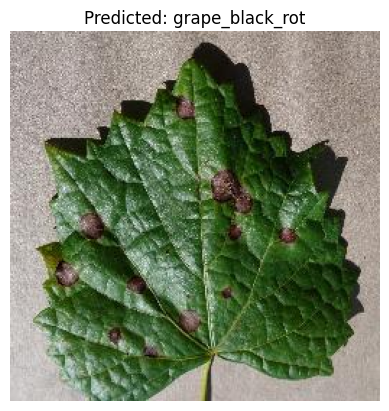

['Busuk', 'Black rot adalah penyakit jamur yang umum terjadi pada tanaman anggur. Gejalanya termasuk munculnya bercak hitam pada daun, buah, dan ranting. Bercak-bercak ini kemudian berkembang menjadi lesi besar yang dapat menyebabkan kerusakan pada tanaman dan buah anggur']


In [5]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models import efficientnet_v2_s
import matplotlib.pyplot as plt

# Load the saved model
model = efficientnet_v2_s(num_classes=4)
model.load_state_dict(torch.load('trained_models.pth'))
model.eval()

# Prepare the new image for input to the model
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load the new image
img = Image.open("image (1).JPG")  # Ensure the filename is provided as a string

# Apply the transformation
img_tensor = transform(img).unsqueeze(0)

# Perform inference
with torch.no_grad():
    predictions = model(img_tensor)

# Get the predicted class index
predicted_class_index = torch.argmax(predictions, dim=1).item()

# Define class labels
class_labels = ["grape_black_rot", "grape_esca","grape_leaf_blight" , "grape_healthy"]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Show the image with the predicted class label as the title
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')  # Hide axes
plt.show()

# Print the predicted class label and description
if predicted_class_label == "grape_black_rot":
    print(["Busuk", "Black rot adalah penyakit jamur yang umum terjadi pada tanaman anggur. Gejalanya termasuk munculnya bercak hitam pada daun, buah, dan ranting. Bercak-bercak ini kemudian berkembang menjadi lesi besar yang dapat menyebabkan kerusakan pada tanaman dan buah anggur"])
elif predicted_class_label == "grape_esca":
    print(["Campak Hitam", "Esca adalah penyakit jamur yang menginfeksi anggur dan dapat menyebabkan kerusakan serius pada tanaman. Gejala umumnya termasuk daun yang menguning, munculnya bercak putih pada daun, dan pertumbuhan tidak normal pada bagian-bagian tanaman. Tanaman anggur yang terinfeksi esca sering mengalami penurunan produktivitas dan kualitas buah."])
elif predicted_class_label == "grape_leaf_blight":
    print(["Hawar Daun", "Leaf blight adalah penyakit yang disebabkan oleh bakteri atau jamur dan sering menyerang tanaman anggur. Gejalanya mencakup munculnya bercak-bintik coklat pada daun, yang kemudian berkembang menjadi lesi besar dan mengering. Tanaman anggur yang terinfeksi leaf blight dapat mengalami penurunan pertumbuhan dan hasil panen yang buruk."])
elif predicted_class_label == "grape_healthy":
    print(["Sehat", "Daun anggur yang sehat memiliki warna hijau yang cerah, tanpa adanya bercak atau lesi. Pertumbuhannya subur, tanpa tanda-tanda penyakit atau gangguan lainnya. Daun yang sehat mendukung proses fotosintesis dan pertumbuhan buah yang baik pada tanaman anggur."])
